In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from datetime import datetime

In [2]:
train = pickle.load(open('c_train.pickle', 'rb'))
b = pickle.load(open('c_b.pickle', 'rb'))
bb = pickle.load(open('c_bb.pickle', 'rb'))
ccb = pickle.load(open('c_cb.pickle', 'rb'))
ip = pickle.load(open('c_ip.pickle', 'rb'))
pcb = pickle.load(open('c_pcb.pickle', 'rb'))
pa = pickle.load(open('c_pa.pickle', 'rb'))
test = pickle.load(open('c_test.pickle', 'rb'))

In [3]:
train.isnull().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

In [4]:
b.isnull().sum()

SK_ID_CURR                0
CREDIT_ACTIVE             0
CREDIT_TYPE               0
CNT_CREDIT_PROLONG        0
CREDIT_DAY_OVERDUE        0
AMT_CREDIT_MAX_OVERDUE    0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
dtype: int64

In [5]:
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [6]:
ccb.isnull().sum()

SK_ID_CURR                   0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_RECEIVABLE_PRINCIPAL     0
AMT_RECIVABLE                0
AMT_TOTAL_RECEIVABLE         0
CNT_INSTALMENT_MATURE_CUM    0
dtype: int64

In [7]:
ip.isnull().sum()

DAYS_ENTRY_PAYMENT    0
AMT_INSTALMENT        0
AMT_PAYMENT           0
dtype: int64

In [8]:
pcb.isnull().sum()

SK_ID_CURR               0
NAME_CONTRACT_STATUS     0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
dtype: int64

In [9]:
pa.isnull().sum()

SK_ID_CURR             0
AMT_DOWN_PAYMENT       0
CODE_REJECT_REASON     0
NAME_YIELD_GROUP       0
PRODUCT_COMBINATION    0
AMT_APPLICATION        0
AMT_CREDIT             0
CNT_PAYMENT            0
dtype: int64

# Train

In [10]:
train = train[[
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    
    #DROP BELOW
    'AMT_INCOME_TOTAL'
]]
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL
0,100002,1,Cash loans,M,Y,Working,0.262949,0.139376,-9461,2,-1134.0,-2120,0,202500.0
1,100003,0,Cash loans,F,N,State servant,0.622246,0.510853,-16765,1,-828.0,-291,0,270000.0
2,100004,0,Revolving loans,M,Y,Working,0.555912,0.729567,-19046,2,-815.0,-2531,0,67500.0
3,100006,0,Cash loans,F,Y,Working,0.650442,0.510853,-19005,2,-617.0,-2437,0,135000.0
4,100007,0,Cash loans,M,Y,Working,0.322738,0.510853,-19932,2,-1106.0,-3458,1,121500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,Working,0.681632,0.510853,-9327,1,-273.0,-1982,0,157500.0
307507,456252,0,Cash loans,F,Y,Pensioner,0.115992,0.510853,-20775,2,0.0,-4090,0,72000.0
307508,456253,0,Cash loans,F,Y,Working,0.535722,0.218859,-14966,3,-1909.0,-5150,1,153000.0
307509,456254,1,Cash loans,F,Y,Commercial associate,0.514163,0.661024,-11961,2,-322.0,-931,1,171000.0


## Merging

### Credit Card Balance with Train

In [11]:
train = train.merge(ccb, how='left', on='SK_ID_CURR')
train.shape

(307511, 20)

### POS Cash Balance with Train

In [12]:
train = train.merge(pcb, how='left', on='SK_ID_CURR')
train.shape

(307511, 23)

### Bureau with Bureau Balance

In [13]:
# b = b.merge(bb, how='left', on='SK_ID_BUREAU')


### Bureau with Train

In [14]:
train = train.merge(b, how='left', on='SK_ID_CURR')
train.shape

(307511, 32)

### Previous Application with Train

In [15]:
train = train.merge(pa, how='left', on='SK_ID_CURR')
train.shape

(307511, 39)

## Feature Engineering

In [16]:
sorted_columns = sorted(train.columns)
for column in sorted_columns:
    print(column)

AMT_APPLICATION
AMT_BALANCE
AMT_CREDIT
AMT_CREDIT_LIMIT_ACTUAL
AMT_CREDIT_MAX_OVERDUE
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
AMT_DOWN_PAYMENT
AMT_INCOME_TOTAL
AMT_RECEIVABLE_PRINCIPAL
AMT_RECIVABLE
AMT_TOTAL_RECEIVABLE
CNT_CREDIT_PROLONG
CNT_INSTALMENT
CNT_INSTALMENT_FUTURE
CNT_INSTALMENT_MATURE_CUM
CNT_PAYMENT
CODE_GENDER
CODE_REJECT_REASON
CREDIT_ACTIVE
CREDIT_DAY_OVERDUE
CREDIT_TYPE
DAYS_BIRTH
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_OWN_REALTY
NAME_CONTRACT_STATUS
NAME_CONTRACT_TYPE
NAME_INCOME_TYPE
NAME_YIELD_GROUP
PRODUCT_COMBINATION
REGION_RATING_CLIENT_W_CITY
REG_CITY_NOT_WORK_CITY
SK_ID_CURR
TARGET


### Debt to Income Ratio

In [41]:
train['DTI'] = train['AMT_CREDIT_SUM_DEBT']/train['AMT_INCOME_TOTAL']
train['DTI'] = train['DTI'].round(2)

### Age

In [18]:
train['AGE'] = (train['DAYS_BIRTH']//365).abs()

In [19]:
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
train.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
AMT_BALANCE                    0.087177
AMT_TOTAL_RECEIVABLE           0.086490
AMT_RECIVABLE                  0.086478
AMT_RECEIVABLE_PRINCIPAL       0.086062
DAYS_BIRTH                     0.078239
AGE                            0.078237
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_LAST_PHONE_CHANGE         0.055217
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
CNT_INSTALMENT_MATURE_CUM      0.040054
AMT_DOWN_PAYMENT               0.026017
AMT_APPLICATION                0.021803
AMT_CREDIT_SUM                 0.019956
AMT_CREDIT                     0.016114
AMT_CREDIT_SUM_LIMIT           0.011538
AMT_CREDIT_LIMIT_ACTUAL        0.008901
CREDIT_DAY_OVERDUE             0.008118
CNT_INSTALMENT                 0.007951
AMT_CREDIT_SUM_OVERDUE         0.007150
DTI                            0.005254
CNT_INSTALMENT_FUTURE          0.005187


In [20]:
train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,CNT_CREDIT_PROLONG,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT,CNT_PAYMENT,DTI,AGE
SK_ID_CURR,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.999711
REGION_RATING_CLIENT_W_CITY,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_LAST_PHONE_CHANGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REG_CITY_NOT_WORK_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


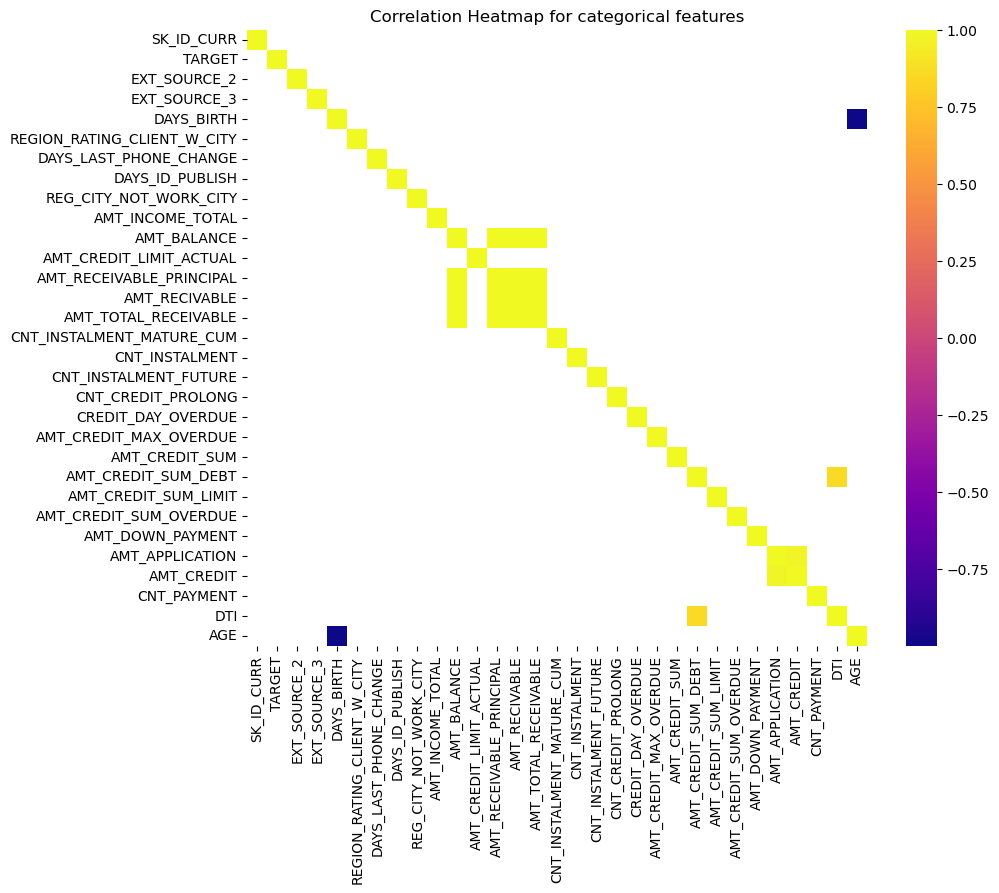

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap((train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]), cmap='plasma', annot=False, annot_kws={'size': 2, 'color':'black'})
plt.title('Correlation Heatmap for categorical features')
plt.show()

In [24]:
train = train[[
    #TRAIN
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    # 'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    
    #CREDIT CARD BALANCE
    'AMT_BALANCE',
    # 'AMT_CREDIT_LIMIT_ACTUAL',
    # 'AMT_RECEIVABLE_PRINCIPAL',
    # 'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM',

    #POS CASH BALANCE
    'NAME_CONTRACT_STATUS',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    
    #BUREAU
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    # 'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',

    #PREVIOUS APPLICATION
    'AMT_DOWN_PAYMENT',
    'CODE_REJECT_REASON',
    'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION',
    'AMT_APPLICATION',
    # 'AMT_CREDIT',
    'CNT_PAYMENT',




    #FEAT ENGINEERING
    'DTI'
    'AGE'
]]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   NAME_INCOME_TYPE             307511 non-null  object 
 6   EXT_SOURCE_2                 307511 non-null  float64
 7   EXT_SOURCE_3                 307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 10  DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 13 

In [38]:
train['DTI'].value_counts()

DTI
0.000000    75506
0.297310       59
0.222982       52
0.254837       47
0.148655       44
            ...  
0.308256        1
0.364633        1
0.224879        1
0.635743        1
0.885953        1
Name: count, Length: 180744, dtype: int64

## Encoding/Scaling

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   NAME_INCOME_TYPE             307511 non-null  object 
 6   EXT_SOURCE_2                 307511 non-null  float64
 7   EXT_SOURCE_3                 307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 10  DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 13 

In [22]:
ord_feats_edit = [
    'FLAG_OWN_REALTY',
    'EXT_SOURCE_2',#
    'EXT_SOURCE_3',
    'AGE',
    'REGION_RATING_CLIENT_W_CITY',
    'CREDIT_DAY_OVERDUE',#
    'AMT_CREDIT_SUM_OVERDUE',#
    'NAME_YIELD_GROUP',
    'DTI'

    # 'FLAG_OWN_REALTY',
    # 'REGION_RATING_CLIENT_W_CITY',
    # 'AMT_CREDIT_LIMIT_ACTUAL',
    # 'NAME_YIELD_GROUP',
    # 'PRODUCT_COMBINATION'
]

ord_feats = train[ord_feats_edit]
ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats




,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1.0,1.0,NaN,3.0,15.0
1,0.0,0.0,NaN,4.0,7.0
2,1.0,1.0,NaN,4.0,14.0
3,1.0,1.0,53.0,0.0,2.0
4,1.0,1.0,NaN,1.0,8.0
...,...,...,...,...,...
307506,0.0,0.0,NaN,1.0,13.0
307507,1.0,1.0,NaN,3.0,10.0
307508,1.0,2.0,NaN,1.0,13.0
307509,1.0,1.0,NaN,1.0,9.0


In [23]:
train.drop(columns=ord_feats, inplace=True)
train = train.merge(new_ord_feats, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,...,CODE_REJECT_REASON,AMT_APPLICATION,AMT_CREDIT,CNT_PAYMENT,DTI,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,Working,0.262949,0.139376,-9461,-1134.0,-2120,...,XAP,179055.000,179055.00,12.000000,0.374699,1.0,1.0,NaN,3.0,15.0
1,100003,0,Cash loans,F,State servant,0.622246,0.510853,-16765,-828.0,-291,...,XAP,435436.500,484191.00,20.000000,0.000000,0.0,0.0,NaN,4.0,7.0
2,100004,0,Revolving loans,M,Working,0.555912,0.729567,-19046,-815.0,-2531,...,XAP,24282.000,20106.00,12.000000,0.000000,1.0,1.0,NaN,4.0,14.0
3,100006,0,Cash loans,F,Working,0.650442,0.510853,-19005,-617.0,-2437,...,XAP,272203.260,291695.50,22.666667,NaN,1.0,1.0,53.0,0.0,2.0
4,100007,0,Cash loans,M,Working,0.322738,0.510853,-19932,-1106.0,-3458,...,XAP,150530.250,166638.75,28.000000,0.000000,1.0,1.0,NaN,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,Working,0.681632,0.510853,-9327,-273.0,-1982,...,XAP,40455.000,40455.00,12.000000,NaN,0.0,0.0,NaN,1.0,13.0
307507,456252,0,Cash loans,F,Pensioner,0.115992,0.510853,-20775,0.0,-4090,...,XAP,57595.500,56821.50,12.000000,NaN,1.0,1.0,NaN,3.0,10.0
307508,456253,0,Cash loans,F,Working,0.535722,0.218859,-14966,-1909.0,-5150,...,XAP,24162.750,20625.75,12.000000,2.934368,1.0,2.0,NaN,1.0,13.0
307509,456254,1,Cash loans,F,Commercial associate,0.514163,0.661024,-11961,-322.0,-931,...,XAP,121317.750,134439.75,12.000000,0.000000,1.0,1.0,NaN,1.0,9.0


In [24]:
nom_feats_edit = [

    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'NAME_CONTRACT_STATUS',
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CODE_REJECT_REASON',
    'PRODUCT_COMBINATION',
    'CNT_PAYMENT',
    'AGE'

    # 'NAME_CONTRACT_TYPE',
    # 'CODE_GENDER',
    # 'NAME_INCOME_TYPE',
    # 'DAYS_BIRTH',
    # 'REG_CITY_NOT_WORK_CITY',
    # 'CNT_INSTALMENT_MATURE_CUM',#
    # 'NAME_CONTRACT_STATUS',
    # 'CNT_INSTALMENT',#
    # 'CNT_INSTALMENT_FUTURE',#
    # 'CREDIT_ACTIVE',
    # 'CREDIT_TYPE',
    # 'CNT_CREDIT_PROLONG',
    # 'CODE_REJECT_REASON',
    # 'CNT_PAYMENT'
]

nom_feats = train[nom_feats_edit]
ce = ce.OneHotEncoder(use_cat_names=True)
ce.fit(nom_feats)
nom_feats_encoded = ce.transform(nom_feats)
nom_feats_encoded



,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,...,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,CNT_PAYMENT
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.000000
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20.000000
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.000000
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.666667
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.000000
307507,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,12.000000
307508,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.000000
307509,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12.000000


In [25]:
train.drop(columns=nom_feats, inplace=True)
train = train.merge(nom_feats_encoded, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_INCOME_TOTAL,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,...,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,CNT_PAYMENT
0,100002,1,0.262949,0.139376,-1134.0,-2120,202500.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000
1,100003,0,0.622246,0.510853,-828.0,-291,270000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,20.000000
2,100004,0,0.555912,0.729567,-815.0,-2531,67500.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000
3,100006,0,0.650442,0.510853,-617.0,-2437,135000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,22.666667
4,100007,0,0.322738,0.510853,-1106.0,-3458,121500.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.681632,0.510853,-273.0,-1982,157500.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000
307507,456252,0,0.115992,0.510853,0.0,-4090,72000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000
307508,456253,0,0.535722,0.218859,-1909.0,-5150,153000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000
307509,456254,1,0.514163,0.661024,-322.0,-931,171000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12.000000


In [26]:
cont_feats_edit = [

    'AMT_BALANCE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_DOWN_PAYMENT',
    'AMT_APPLICATION'
    

    # 'EXT_SOURCE_2',
    # 'EXT_SOURCE_3',
    # 'DAYS_LAST_PHONE_CHANGE',
    # 'DAYS_ID_PUBLISH',
    # 'AMT_BALANCE',
    # 'AMT_RECEIVABLE_PRINCIPAL',
    # 'AMT_RECIVABLE',
    # 'AMT_TOTAL_RECEIVABLE',
    # 'CREDIT_DAY_OVERDUE',#
    # 'AMT_CREDIT_MAX_OVERDUE',
    # 'AMT_CREDIT_SUM',
    # 'AMT_CREDIT_SUM_DEBT',
    # 'AMT_CREDIT_SUM_LIMIT',
    # 'AMT_CREDIT_SUM_OVERDUE',
    # 'AMT_DOWN_PAYMENT',
    # 'AMT_APPLICATION',
    # 'AMT_CREDIT',

    # 'DTI'

]
cont_feats = train[cont_feats_edit]
min = MinMaxScaler()
min.fit(cont_feats)
cont_feats_scaled = min.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT,DTI
0,0.307542,0.155054,0.735788,0.705433,NaN,NaN,NaN,NaN,0.0,0.000022,0.000546,0.025920,0.046654,0.0,0.000000,0.044211,0.044211,0.014557
1,0.727773,0.569889,0.807083,0.959566,NaN,NaN,NaN,NaN,0.0,0.000000,0.001284,0.024224,0.134380,0.0,0.001159,0.107515,0.119553,0.013604
2,0.650190,0.814130,0.810112,0.648326,NaN,NaN,NaN,NaN,0.0,0.000000,0.000477,0.024224,0.043792,0.0,0.002455,0.005996,0.004964,0.013604
3,0.760751,0.569889,0.856244,0.661387,0.003145,0.003302,0.003199,0.003199,NaN,NaN,NaN,NaN,NaN,NaN,0.004276,0.067211,0.072024,NaN
4,0.377472,0.569889,0.742311,0.519522,NaN,NaN,NaN,NaN,0.0,0.000000,0.000738,0.024224,0.043792,0.0,0.000571,0.037168,0.041145,0.013604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.797231,0.569889,0.936393,0.724607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.009989,0.009989,NaN
307507,0.135663,0.569889,1.000000,0.431708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001745,0.014221,0.014030,NaN
307508,0.626575,0.243815,0.555219,0.284424,NaN,NaN,NaN,NaN,0.0,0.000000,0.004998,0.034260,0.043792,0.0,0.002224,0.005966,0.005093,0.021064
307509,0.601360,0.737587,0.924977,0.870641,NaN,NaN,NaN,NaN,0.0,0.000000,0.000227,0.024224,0.043792,0.0,0.000000,0.029955,0.033195,0.013604


In [27]:
train.drop(columns=cont_feats, inplace=True)
train = train.merge(new_cont_feats, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,...,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT,DTI
0,100002,1,202500.0,1.0,1.0,NaN,3.0,15.0,1,0,...,0.0,0.000022,0.000546,0.025920,0.046654,0.0,0.000000,0.044211,0.044211,0.014557
1,100003,0,270000.0,0.0,0.0,NaN,4.0,7.0,1,0,...,0.0,0.000000,0.001284,0.024224,0.134380,0.0,0.001159,0.107515,0.119553,0.013604
2,100004,0,67500.0,1.0,1.0,NaN,4.0,14.0,0,1,...,0.0,0.000000,0.000477,0.024224,0.043792,0.0,0.002455,0.005996,0.004964,0.013604
3,100006,0,135000.0,1.0,1.0,53.0,0.0,2.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004276,0.067211,0.072024,NaN
4,100007,0,121500.0,1.0,1.0,NaN,1.0,8.0,1,0,...,0.0,0.000000,0.000738,0.024224,0.043792,0.0,0.000571,0.037168,0.041145,0.013604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,0.0,0.0,NaN,1.0,13.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.009989,0.009989,NaN
307507,456252,0,72000.0,1.0,1.0,NaN,3.0,10.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001745,0.014221,0.014030,NaN
307508,456253,0,153000.0,1.0,2.0,NaN,1.0,13.0,1,0,...,0.0,0.000000,0.004998,0.034260,0.043792,0.0,0.002224,0.005966,0.005093,0.021064
307509,456254,1,171000.0,1.0,1.0,NaN,1.0,9.0,1,0,...,0.0,0.000000,0.000227,0.024224,0.043792,0.0,0.000000,0.029955,0.033195,0.013604


## Train Test Split

In [28]:
x = train.drop(columns=['SK_ID_CURR', 'TARGET'], axis=1)
x

,AMT_INCOME_TOTAL,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,...,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT,DTI
0,202500.0,1.0,1.0,NaN,3.0,15.0,1,0,1,0,...,0.0,0.000022,0.000546,0.025920,0.046654,0.0,0.000000,0.044211,0.044211,0.014557
1,270000.0,0.0,0.0,NaN,4.0,7.0,1,0,0,1,...,0.0,0.000000,0.001284,0.024224,0.134380,0.0,0.001159,0.107515,0.119553,0.013604
2,67500.0,1.0,1.0,NaN,4.0,14.0,0,1,1,0,...,0.0,0.000000,0.000477,0.024224,0.043792,0.0,0.002455,0.005996,0.004964,0.013604
3,135000.0,1.0,1.0,53.0,0.0,2.0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004276,0.067211,0.072024,NaN
4,121500.0,1.0,1.0,NaN,1.0,8.0,1,0,1,0,...,0.0,0.000000,0.000738,0.024224,0.043792,0.0,0.000571,0.037168,0.041145,0.013604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,0.0,0.0,NaN,1.0,13.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.009989,0.009989,NaN
307507,72000.0,1.0,1.0,NaN,3.0,10.0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001745,0.014221,0.014030,NaN
307508,153000.0,1.0,2.0,NaN,1.0,13.0,1,0,0,1,...,0.0,0.000000,0.004998,0.034260,0.043792,0.0,0.002224,0.005966,0.005093,0.021064
307509,171000.0,1.0,1.0,NaN,1.0,9.0,1,0,0,1,...,0.0,0.000000,0.000227,0.024224,0.043792,0.0,0.000000,0.029955,0.033195,0.013604


In [29]:
y = train['TARGET']
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, stratify=y)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((230633, 78), (230633,), (76878, 78), (76878,))

In [31]:
xgb = XGBClassifier(random_state=0)
xgb_model = xgb.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xtest)

In [32]:
print('XGB Accuracy Score: ', accuracy_score(ytest, xgb_pred))
print('XGB Precision Score: ', precision_score(ytest, xgb_pred))
print('XGB Recall Score: ', recall_score(ytest, xgb_pred))

XGB Accuracy Score:  0.9183901766435131
XGB Precision Score:  0.40607734806629836
XGB Recall Score:  0.02368675475346439


Baseline
XGB Accuracy Score:  0.9185722833580479
XGB Precision Score:  0.4274193548387097
XGB Recall Score:  0.025620367386400257

In [33]:
roc_auc_score(ytest, xgb_pred)

0.5103222657625145

# TEST

In [34]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [35]:
test = test[[
    'SK_ID_CURR',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY'
]]

test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,100001,Cash loans,F,Y,Working,0.789654,0.159520,-19241,2,-1740.0,-812,0
1,100005,Cash loans,M,Y,Working,0.291656,0.432962,-18064,2,0.0,-1623,0
2,100013,Cash loans,M,Y,Working,0.699787,0.610991,-20038,2,-856.0,-3503,0
3,100028,Cash loans,F,Y,Working,0.509677,0.612704,-13976,2,-1805.0,-4208,0
4,100038,Cash loans,M,N,Working,0.425687,NaN,-13040,2,-821.0,-4262,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,Y,Working,0.648575,0.643026,-19970,3,-684.0,-3399,0
48740,456222,Cash loans,F,N,Commercial associate,0.684596,NaN,-11186,2,0.0,-3003,1
48741,456223,Cash loans,F,Y,Commercial associate,0.632770,0.283712,-15922,2,-838.0,-1504,0
48742,456224,Cash loans,M,N,Commercial associate,0.445701,0.595456,-13968,2,-2308.0,-1364,1


## Credit Card Balance with Test

In [36]:
test = test.merge(ccb, how='left', on='SK_ID_CURR')

In [37]:
test.shape

(48744, 18)

## POS Cash Balance with Test

In [38]:
test = test.merge(pcb, how='left', on='SK_ID_CURR')

In [39]:
test.shape

(48744, 21)

## Bureau with Test

In [40]:
test = test.merge(b, how='left', on='SK_ID_CURR')

In [41]:
test.shape

(48744, 30)

## Previous Application with Test

In [42]:
test = test.merge(pa, how='left', on='SK_ID_CURR')

In [43]:
test.shape

(48744, 37)

## Encoding / Scaling 

### Ordinal Encoding

In [44]:
ord_feat_test = test[ord_feats_edit]
ord_feat_test_encoded = ord.transform(ord_feat_test)
new_ord_feats_test = pd.DataFrame(ord_feat_test_encoded, columns=ord_feat_test.columns)
new_ord_feats_test

,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1.0,1.0,NaN,1.0,13.0
1,1.0,1.0,NaN,0.0,2.0
2,1.0,1.0,33.0,4.0,2.0
3,1.0,1.0,45.0,0.0,1.0
4,0.0,1.0,NaN,1.0,8.0
...,...,...,...,...,...
48739,1.0,2.0,NaN,3.0,4.0
48740,0.0,1.0,NaN,1.0,6.0
48741,1.0,1.0,NaN,3.0,11.0
48742,0.0,1.0,NaN,1.0,13.0


In [45]:
test.drop(columns=ord_feat_test, inplace=True)
test = test.merge(new_ord_feats_test, left_index=True, right_index=True)
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,...,AMT_DOWN_PAYMENT,CODE_REJECT_REASON,AMT_APPLICATION,AMT_CREDIT,CNT_PAYMENT,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100001,Cash loans,F,Working,0.789654,0.159520,-19241,-1740.0,-812,0,...,2520.000000,XAP,24835.5000,23787.0000,12.0,1.0,1.0,NaN,1.0,13.0
1,100005,Cash loans,M,Working,0.291656,0.432962,-18064,0.0,-1623,0,...,2232.000000,XAP,22308.7500,20076.7500,24.0,1.0,1.0,NaN,0.0,2.0
2,100013,Cash loans,M,Working,0.699787,0.610991,-20038,-856.0,-3503,0,...,1687.500000,XAP,130871.2500,146134.1250,24.0,1.0,1.0,33.0,4.0,2.0
3,100028,Cash loans,F,Working,0.509677,0.612704,-13976,-1805.0,-4208,0,...,2902.164478,XAP,49207.5000,92920.5000,14.4,1.0,1.0,45.0,0.0,1.0
4,100038,Cash loans,M,Working,0.425687,NaN,-13040,-821.0,-4262,1,...,4047.750000,XAP,267727.5000,300550.5000,24.0,0.0,1.0,NaN,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,Working,0.648575,0.643026,-19970,-684.0,-3399,0,...,0.000000,XAP,225000.0000,254700.0000,36.0,1.0,2.0,NaN,3.0,4.0
48740,456222,Cash loans,F,Commercial associate,0.684596,NaN,-11186,0.0,-3003,1,...,900.000000,XAP,86871.3750,98704.1250,18.0,0.0,1.0,NaN,1.0,6.0
48741,456223,Cash loans,F,Commercial associate,0.632770,0.283712,-15922,-838.0,-1504,0,...,8543.250000,XAP,141060.0825,132516.8325,12.0,1.0,1.0,NaN,3.0,11.0
48742,456224,Cash loans,M,Commercial associate,0.445701,0.595456,-13968,-2308.0,-1364,1,...,900.000000,XAP,113758.2000,127578.6000,21.6,0.0,1.0,NaN,1.0,13.0


### Nominal Encoding

In [46]:
nom_feats_test = test[nom_feats_edit]
nom_feats_encoded_test = ce.transform(nom_feats_test)


In [47]:
test.drop(columns=nom_feats_test, inplace=True)
test = test.merge(nom_feats_encoded_test, left_index=True, right_index=True)
test

,SK_ID_CURR,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CREDIT_DAY_OVERDUE,...,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,CNT_PAYMENT
0,100001,0.789654,0.159520,-1740.0,-812,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,12.0
1,100005,0.291656,0.432962,0.0,-1623,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,24.0
2,100013,0.699787,0.610991,-856.0,-3503,18159.919219,17255.559844,18101.079844,18101.079844,0.0,...,0,0,0,0,0,0,0,0,0,24.0
3,100028,0.509677,0.612704,-1805.0,-4208,8085.058163,7680.352041,7968.609184,7968.609184,0.0,...,0,0,0,0,0,0,0,0,0,14.4
4,100038,0.425687,NaN,-821.0,-4262,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.648575,0.643026,-684.0,-3399,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,36.0
48740,456222,0.684596,NaN,0.0,-3003,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,18.0
48741,456223,0.632770,0.283712,-838.0,-1504,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,12.0
48742,456224,0.445701,0.595456,-2308.0,-1364,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,21.6


### Scaling

In [48]:
cont_feats_test = test[cont_feats_edit]
cont_feats_scaled_test = min.transform(cont_feats_test)
new_cont_feats_test = pd.DataFrame(cont_feats_scaled_test, columns=cont_feats_test.columns)
new_cont_feats_test


KeyError: "['DTI'] not in index"

In [ ]:
test.drop(columns=cont_feats_test, inplace=True)
test = test.merge(new_cont_feats_test, left_index=True, right_index=True)
test

,SK_ID_CURR,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT_LIMIT_ACTUAL,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,...,AMT_TOTAL_RECEIVABLE,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT
0,100001,1.0,1.0,NaN,1.0,13.0,1,0,0,1,...,NaN,0.0,0.000000,0.001048,0.026129,0.043792,0.0,0.001273,0.006132,0.005873
1,100005,1.0,1.0,NaN,0.0,2.0,1,0,1,0,...,NaN,0.0,0.000000,0.001106,0.028459,0.043792,0.0,0.001127,0.005508,0.004957
2,100013,1.0,1.0,33.0,4.0,2.0,1,0,1,0,...,0.022959,0.0,0.000102,0.002616,0.024224,0.043792,0.0,0.000852,0.032314,0.036083
3,100028,1.0,1.0,45.0,0.0,1.0,1,0,0,1,...,0.011898,0.0,0.000000,0.000640,0.025019,0.050271,0.0,0.001466,0.012150,0.022943
4,100038,0.0,1.0,NaN,1.0,8.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002044,0.066106,0.074210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,1.0,2.0,NaN,3.0,4.0,1,0,0,1,...,NaN,0.0,0.000096,0.001130,0.026712,0.043792,0.0,0.000000,0.055556,0.062889
48740,456222,0.0,1.0,NaN,1.0,6.0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000455,0.021450,0.024371
48741,456223,1.0,1.0,NaN,3.0,11.0,1,0,0,1,...,NaN,0.0,0.000000,0.002177,0.024319,0.047058,0.0,0.004315,0.034830,0.032720
48742,456224,0.0,1.0,NaN,1.0,13.0,1,0,1,0,...,NaN,0.0,0.000009,0.001143,0.025259,0.043792,0.0,0.000455,0.028088,0.031501


In [ ]:
test.shape, xtrain.shape

((48744, 77), (230633, 76))

In [ ]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

set()

In [ ]:
set(test.columns.tolist()) - set(xtrain.columns.tolist())

{'SK_ID_CURR'}

In [ ]:
test2 = test.reindex(columns=xtrain.columns).fillna(0)
test2 = test2[xtrain.columns]

In [ ]:
test2.shape, xtrain.shape

((48744, 76), (230633, 76))

In [ ]:
xgb_pred_test = xgb_model.predict(test2)
xgb_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
predictions = xgb_model.predict_proba(test2)
predictions

array([[0.9590144 , 0.04098557],
       [0.75944525, 0.24055475],
       [0.944735  , 0.05526501],
       ...,
       [0.9672628 , 0.03273717],
       [0.95408905, 0.04591096],
       [0.76909417, 0.23090585]], dtype=float32)

In [ ]:
results = pd.DataFrame(predictions, columns=['Prob_of_0', 'Prob_of_1'])
results

,Prob_of_0,Prob_of_1
0,0.959014,0.040986
1,0.759445,0.240555
2,0.944735,0.055265
3,0.951270,0.048730
4,0.660447,0.339554
...,...,...
48739,0.944000,0.056000
48740,0.795122,0.204878
48741,0.967263,0.032737
48742,0.954089,0.045911


In [ ]:
xgb_pred_test[1]

0

In [ ]:
submission = test[['SK_ID_CURR']]
submission

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [ ]:
submission.value_counts()

SK_ID_CURR
100001        1
336464        1
336413        1
336418        1
336426        1
             ..
217143        1
217148        1
217155        1
217162        1
456250        1
Name: count, Length: 48744, dtype: int64

In [ ]:
submission.loc[:, 'TARGET'] = xgb_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_37412\275149981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'TARGET'] = xgb_pred_test


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [ ]:
submission['TARGET'].value_counts()

TARGET
0    47430
1     1314
Name: count, dtype: int64

In [ ]:
# submission.to_csv('project_loan_baseline.csv', index=False)